# 데이터 분석(t1) - 1회차

#### 각 columne 및 의미

In [7]:
codebook = pd.read_csv(r'C:\Users\osulg\Desktop/Network Hackathon/task1_data/task1_data/t1_codebook.csv')
display(codebook)

,column_name,description
0,fwd_pkt_count,순방향(FWD) 패킷 수
1,bwd_pkt_count,역방향(BWD) 패킷 수
2,fwd_tcp_pkt_count,순방향 TCP 패킷 수
3,bwd_tcp_pkt_count,역방향 TCP 패킷 수
4,fwd_udp_pkt_count,순방향 UDP 패킷 수
5,bwd_udp_pkt_count,역방향 UDP 패킷 수
6,traffic_volume,네트워크 트래픽 용량
7,fwd_tcp_flags_cwr_count,순방향 TCP CWR 플래그가 설정된 패킷 수
8,bwd_tcp_flags_cwr_count,역방향 TCP CWR 플래그가 설정된 패킷 수
9,fwd_tcp_flags_ecn_count,순방향 TCP ECN 플래그가 설정된 패킷 수


#### 라이브러리 불러오기

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
# train 데이터 가져오기
# 70만개 데이터 추출

df_train = pd.read_csv(r'C:\Users\osulg\Desktop\Network Hackathon\task1_data\task1_data\train_data.csv')
print('학습 데이터 : {}개'.format(len(df_train)))

학습 데이터 : 700000개


## > 데이터 확인

In [9]:
# 상위 20개 데이터 확인
df_train.head(20)

,fwd_pkt_count,bwd_pkt_count,fwd_tcp_pkt_count,bwd_tcp_pkt_count,fwd_udp_pkt_count,bwd_udp_pkt_count,traffic_volume,fwd_tcp_flags_cwr_count,bwd_tcp_flags_cwr_count,fwd_tcp_flags_ecn_count,...,bwd_tcp_flags_syn_count,fwd_tcp_flags_fin_count,bwd_tcp_flags_fin_count,fwd_tcp_window_size_avg,bwd_tcp_window_size_avg,fwd_tcp_window_size_max,bwd_tcp_window_size_max,fwd_tcp_window_size_min,bwd_tcp_window_size_min,peak_volume
0,2692.0,2500.0,2107.0,1469.0,585.0,1031.0,4104705.0,1.0,0.0,1.0,...,20.0,19.0,18.0,2870.1912,2958.8408,65535.0,65535.0,0.0,0.0,8514009.0
1,3308.0,3523.0,2423.0,1801.0,885.0,1722.0,5524642.0,2.0,0.0,2.0,...,29.0,11.0,7.0,3595.7969,2821.0300,65535.0,65535.0,0.0,0.0,8514009.0
2,3873.0,4359.0,2888.0,2678.0,985.0,1681.0,6884987.0,1.0,0.0,1.0,...,39.0,27.0,16.0,3036.9082,2493.0757,65535.0,65535.0,0.0,0.0,8514009.0
3,3925.0,3466.0,3076.0,2843.0,849.0,623.0,5625499.0,3.0,0.0,3.0,...,40.0,14.0,20.0,4129.6620,2544.9324,65535.0,65535.0,0.0,0.0,8514009.0
4,4104.0,3532.0,2962.0,3000.0,1142.0,532.0,5862785.0,3.0,0.0,3.0,...,43.0,18.0,10.0,5132.5576,2306.5234,65535.0,65535.0,0.0,0.0,8514009.0
5,3657.0,4298.0,2852.0,2806.0,805.0,1492.0,6340960.0,1.0,0.0,1.0,...,57.0,19.0,17.0,3863.2250,2812.4440,65535.0,65535.0,0.0,0.0,8514009.0
6,4196.0,5859.0,3156.0,2967.0,1040.0,2892.0,8514009.0,1.0,0.0,1.0,...,39.0,19.0,16.0,4247.7210,2575.5470,65535.0,65535.0,0.0,0.0,7726877.0
7,3864.0,4639.0,2971.0,2839.0,893.0,1800.0,7125112.0,1.0,0.0,1.0,...,53.0,53.0,52.0,4208.6970,2206.6611,65535.0,65535.0,0.0,0.0,7726877.0
8,3956.0,4113.0,3176.0,3181.0,780.0,932.0,6634485.0,2.0,0.0,2.0,...,25.0,21.0,22.0,3854.3643,1656.4926,65535.0,65535.0,0.0,0.0,7726877.0
9,3750.0,2633.0,2860.0,2005.0,890.0,628.0,4472193.0,1.0,0.0,1.0,...,15.0,40.0,20.0,3780.2720,2102.7844,65535.0,65535.0,0.0,0.0,7726877.0


In [10]:
# 데이터 정보 확인
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fwd_pkt_count              700000 non-null  float64
 1   bwd_pkt_count              700000 non-null  float64
 2   fwd_tcp_pkt_count          700000 non-null  float64
 3   bwd_tcp_pkt_count          700000 non-null  float64
 4   fwd_udp_pkt_count          700000 non-null  float64
 5   bwd_udp_pkt_count          700000 non-null  float64
 6   traffic_volume             700000 non-null  float64
 7   fwd_tcp_flags_cwr_count    700000 non-null  float64
 8   bwd_tcp_flags_cwr_count    700000 non-null  float64
 9   fwd_tcp_flags_ecn_count    700000 non-null  float64
 10  bwd_tcp_flags_ecn_count    700000 non-null  float64
 11  fwd_tcp_flags_ack_count    700000 non-null  float64
 12  bwd_tcp_flags_ack_count    700000 non-null  float64
 13  fwd_tcp_flags_push_count   70

In [11]:
null_count = df_train.isnull().sum()
print('결측치 개수\n', null_count)

결측치 개수
 fwd_pkt_count                0
bwd_pkt_count                0
fwd_tcp_pkt_count            0
bwd_tcp_pkt_count            0
fwd_udp_pkt_count            0
bwd_udp_pkt_count            0
traffic_volume               0
fwd_tcp_flags_cwr_count      0
bwd_tcp_flags_cwr_count      0
fwd_tcp_flags_ecn_count      0
bwd_tcp_flags_ecn_count      0
fwd_tcp_flags_ack_count      0
bwd_tcp_flags_ack_count      0
fwd_tcp_flags_push_count     0
bwd_tcp_flags_push_count     0
fwd_tcp_flags_reset_count    0
bwd_tcp_flags_reset_count    0
fwd_tcp_flags_syn_count      0
bwd_tcp_flags_syn_count      0
fwd_tcp_flags_fin_count      0
bwd_tcp_flags_fin_count      0
fwd_tcp_window_size_avg      0
bwd_tcp_window_size_avg      0
fwd_tcp_window_size_max      0
bwd_tcp_window_size_max      0
fwd_tcp_window_size_min      0
bwd_tcp_window_size_min      0
peak_volume                  0
dtype: int64


In [12]:
df_train.columns

Index(['fwd_pkt_count', 'bwd_pkt_count', 'fwd_tcp_pkt_count',
       'bwd_tcp_pkt_count', 'fwd_udp_pkt_count', 'bwd_udp_pkt_count',
       'traffic_volume', 'fwd_tcp_flags_cwr_count', 'bwd_tcp_flags_cwr_count',
       'fwd_tcp_flags_ecn_count', 'bwd_tcp_flags_ecn_count',
       'fwd_tcp_flags_ack_count', 'bwd_tcp_flags_ack_count',
       'fwd_tcp_flags_push_count', 'bwd_tcp_flags_push_count',
       'fwd_tcp_flags_reset_count', 'bwd_tcp_flags_reset_count',
       'fwd_tcp_flags_syn_count', 'bwd_tcp_flags_syn_count',
       'fwd_tcp_flags_fin_count', 'bwd_tcp_flags_fin_count',
       'fwd_tcp_window_size_avg', 'bwd_tcp_window_size_avg',
       'fwd_tcp_window_size_max', 'bwd_tcp_window_size_max',
       'fwd_tcp_window_size_min', 'bwd_tcp_window_size_min', 'peak_volume'],
      dtype='object')

In [13]:
for col in ['traffic_volume', 'peak_volume']:
    print(col, "unique : ", df_train[col].nunique(), " | min/max : ", df_train[col].min(), df_train[col].max())

traffic_volume unique :  684344  | min/max :  1150710.0 72369180.0
peak_volume unique :  160296  | min/max :  1553921.0 72369180.0


In [14]:
dups = df_train.duplicated().sum()
print("중복 행 수 : ", dups)

중복 행 수 :  0


## > 데이터 통계량 확인

In [15]:
df_des = df_train.describe().T
df_des

,count,mean,std,min,25%,50%,75%,max
fwd_pkt_count,700000.0,1.426499e+04,1.029977e+04,1.276000e+03,3.969000e+03,1.064450e+04,2.479400e+04,4.467900e+04
bwd_pkt_count,700000.0,2.152281e+04,1.794977e+04,5.320000e+02,2.634000e+03,1.654000e+04,4.055900e+04,5.423000e+04
fwd_tcp_pkt_count,700000.0,1.131068e+04,8.242588e+03,6.900000e+02,3.254000e+03,8.154000e+03,1.973900e+04,3.565500e+04
bwd_tcp_pkt_count,700000.0,1.784241e+04,1.528417e+04,4.790000e+02,2.262000e+03,1.217600e+04,3.388000e+04,4.955900e+04
fwd_udp_pkt_count,700000.0,2.954309e+03,2.189406e+03,3.420000e+02,7.310000e+02,2.559000e+03,4.839000e+03,1.560800e+04
bwd_udp_pkt_count,700000.0,3.680407e+03,3.190222e+03,1.000000e+01,3.060000e+02,3.674000e+03,6.163000e+03,1.861500e+04
traffic_volume,700000.0,2.955812e+07,2.347550e+07,1.150710e+06,5.161243e+06,2.271496e+07,5.429031e+07,7.236918e+07
fwd_tcp_flags_cwr_count,700000.0,1.559231e+00,1.131277e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01
bwd_tcp_flags_cwr_count,700000.0,2.246357e-01,1.559038e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+01
fwd_tcp_flags_ecn_count,700000.0,1.589597e+00,1.243219e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01


In [16]:
df_des.to_csv('df_des.csv', encoding='utf=8-sig')

#### >> 각 index의 표준편차

In [17]:
df_train.std()

fwd_pkt_count                1.029977e+04
bwd_pkt_count                1.794977e+04
fwd_tcp_pkt_count            8.242588e+03
bwd_tcp_pkt_count            1.528417e+04
fwd_udp_pkt_count            2.189406e+03
bwd_udp_pkt_count            3.190222e+03
traffic_volume               2.347550e+07
fwd_tcp_flags_cwr_count      1.131277e+00
bwd_tcp_flags_cwr_count      1.559038e+00
fwd_tcp_flags_ecn_count      1.243219e+00
bwd_tcp_flags_ecn_count      1.545234e+00
fwd_tcp_flags_ack_count      8.016447e+03
bwd_tcp_flags_ack_count      1.525741e+04
fwd_tcp_flags_push_count     1.087325e+03
bwd_tcp_flags_push_count     2.335403e+03
fwd_tcp_flags_reset_count    5.947870e+01
bwd_tcp_flags_reset_count    4.130497e+01
fwd_tcp_flags_syn_count      2.320501e+02
bwd_tcp_flags_syn_count      1.737918e+02
fwd_tcp_flags_fin_count      1.271167e+02
bwd_tcp_flags_fin_count      1.362750e+02
fwd_tcp_window_size_avg      3.584794e+03
bwd_tcp_window_size_avg      3.319655e+03
fwd_tcp_window_size_max      0.000

#### >> 각 index의 평균

In [18]:
df_train.mean()

fwd_pkt_count                1.426499e+04
bwd_pkt_count                2.152281e+04
fwd_tcp_pkt_count            1.131068e+04
bwd_tcp_pkt_count            1.784241e+04
fwd_udp_pkt_count            2.954309e+03
bwd_udp_pkt_count            3.680407e+03
traffic_volume               2.955812e+07
fwd_tcp_flags_cwr_count      1.559231e+00
bwd_tcp_flags_cwr_count      2.246357e-01
fwd_tcp_flags_ecn_count      1.589597e+00
bwd_tcp_flags_ecn_count      2.796943e-01
fwd_tcp_flags_ack_count      1.102650e+04
bwd_tcp_flags_ack_count      1.780592e+04
fwd_tcp_flags_push_count     1.440576e+03
bwd_tcp_flags_push_count     2.742022e+03
fwd_tcp_flags_reset_count    6.450655e+01
bwd_tcp_flags_reset_count    5.380491e+01
fwd_tcp_flags_syn_count      2.787371e+02
bwd_tcp_flags_syn_count      2.048979e+02
fwd_tcp_flags_fin_count      1.518491e+02
bwd_tcp_flags_fin_count      1.598984e+02
fwd_tcp_window_size_avg      7.136270e+03
bwd_tcp_window_size_avg      3.945947e+03
fwd_tcp_window_size_max      6.553

In [19]:
df_des['데이터 변동성'] = ''
df_des

,count,mean,std,min,25%,50%,75%,max,데이터 변동성
fwd_pkt_count,700000.0,1.426499e+04,1.029977e+04,1.276000e+03,3.969000e+03,1.064450e+04,2.479400e+04,4.467900e+04,
bwd_pkt_count,700000.0,2.152281e+04,1.794977e+04,5.320000e+02,2.634000e+03,1.654000e+04,4.055900e+04,5.423000e+04,
fwd_tcp_pkt_count,700000.0,1.131068e+04,8.242588e+03,6.900000e+02,3.254000e+03,8.154000e+03,1.973900e+04,3.565500e+04,
bwd_tcp_pkt_count,700000.0,1.784241e+04,1.528417e+04,4.790000e+02,2.262000e+03,1.217600e+04,3.388000e+04,4.955900e+04,
fwd_udp_pkt_count,700000.0,2.954309e+03,2.189406e+03,3.420000e+02,7.310000e+02,2.559000e+03,4.839000e+03,1.560800e+04,
bwd_udp_pkt_count,700000.0,3.680407e+03,3.190222e+03,1.000000e+01,3.060000e+02,3.674000e+03,6.163000e+03,1.861500e+04,
traffic_volume,700000.0,2.955812e+07,2.347550e+07,1.150710e+06,5.161243e+06,2.271496e+07,5.429031e+07,7.236918e+07,
fwd_tcp_flags_cwr_count,700000.0,1.559231e+00,1.131277e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01,
bwd_tcp_flags_cwr_count,700000.0,2.246357e-01,1.559038e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+01,
fwd_tcp_flags_ecn_count,700000.0,1.589597e+00,1.243219e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01,


In [20]:
mean = df_des['mean']
std = df_des['std']

def over_data(row):
    if row['std'] > row['mean']:
        return 'over'
    else:
        return ''

df_des['데이터 변동성'] = df_des.apply(over_data, axis=1)
df_des

,count,mean,std,min,25%,50%,75%,max,데이터 변동성
fwd_pkt_count,700000.0,1.426499e+04,1.029977e+04,1.276000e+03,3.969000e+03,1.064450e+04,2.479400e+04,4.467900e+04,
bwd_pkt_count,700000.0,2.152281e+04,1.794977e+04,5.320000e+02,2.634000e+03,1.654000e+04,4.055900e+04,5.423000e+04,
fwd_tcp_pkt_count,700000.0,1.131068e+04,8.242588e+03,6.900000e+02,3.254000e+03,8.154000e+03,1.973900e+04,3.565500e+04,
bwd_tcp_pkt_count,700000.0,1.784241e+04,1.528417e+04,4.790000e+02,2.262000e+03,1.217600e+04,3.388000e+04,4.955900e+04,
fwd_udp_pkt_count,700000.0,2.954309e+03,2.189406e+03,3.420000e+02,7.310000e+02,2.559000e+03,4.839000e+03,1.560800e+04,
bwd_udp_pkt_count,700000.0,3.680407e+03,3.190222e+03,1.000000e+01,3.060000e+02,3.674000e+03,6.163000e+03,1.861500e+04,
traffic_volume,700000.0,2.955812e+07,2.347550e+07,1.150710e+06,5.161243e+06,2.271496e+07,5.429031e+07,7.236918e+07,
fwd_tcp_flags_cwr_count,700000.0,1.559231e+00,1.131277e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01,
bwd_tcp_flags_cwr_count,700000.0,2.246357e-01,1.559038e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+01,over
fwd_tcp_flags_ecn_count,700000.0,1.589597e+00,1.243219e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01,


##### index 데이터 중에서 std가 mean보다 큰 경우
> 데이터 변동성이
>> std/mean
- bwd_tcp_flags_cwr_count (역방향 TCP CWR 플래그가 설정된 패킷 수) : 6.94
- bwd_tcp_flags_ecn_count (역방향 TCP ECN 플래그가 설정된 패킷 수) : 5.52
- fwd_tcp_window_size_min (순방향 TCP 윈도우 크기 최소값) : 16.69
- bwd_tcp_window_size_min (역방향 TCP 윈도우 크기 최소값) : 301.8

#### <font color=blue> bwd_tcp_flags_cwr_count (역방향 TCP CWR 플래그가 설정된 패킷 수) </font>
- std/mean : 6.94
- CWR(Congestion Window Reduced) flag는 TCP 혼잡 제어 관련 이벤트에서 발생
- 일반적인 정상 트래픽에서는 대부분 0
- -> 따라서, 값이 튀는 값에서 혼잡도가 높아질 가능성 있음

#### <font color=blue>bwd_tcp_flags_ecn_count (역방향 TCP ECN 플래그가 설정된 패킷 수)</font>
- std/mean : 5.52
- ECN(Explicit Congestion Notification)는 혼잡 상황에서만 설정되는 특수 플래그

#### <font color=blue>bwd_tcp_flags_ecn_count (역방향 TCP ECN 플래그가 설정된 패킷 수)</font>
- std/mean : 16.69
- 한 윈도(측정 시점)에서 관측된 순방향 TCP 윈도 크기들 중 최솟값
- 

#### <font color=blue>bwd_tcp_window_size_min (역방향 TCP 윈도우 크기 최소값)</font>
- std/mean : 301.8
- 역방향(수신측) 윈도 크기 중 최소값
- 

In [21]:
cols = [
 'bwd_tcp_flags_cwr_count',
 'bwd_tcp_flags_ecn_count',
 'fwd_tcp_window_size_min',
 'bwd_tcp_window_size_min'
]

for c in cols:
    s = df_train[c].dropna()
    n = len(s)
    nz = (s != 0).sum()
    nz_pct = nz / n * 100
    p50 = s.quantile(0.5)
    p90 = s.quantile(0.9)
    p99 = s.quantile(0.99)
    p999 = s.quantile(0.999)
    mx = s.max()
    print(f"=== {c} ===")
    print(f"count={n}, nonzero={nz} ({nz_pct:.4f}%)")
    print(f"mean={s.mean():.6g}, std={s.std():.6g}")
    print(f"median={p50:.6g}, 90%={p90:.6g}, 99%={p99:.6g}, 99.9%={p999:.6g}, max={mx:.6g}")
    print("top 10 values:", s.sort_values(ascending=False).head(10).values)
    print()

=== bwd_tcp_flags_cwr_count ===
count=700000, nonzero=42034 (6.0049%)
mean=0.224636, std=1.55904
median=0, 90%=0, 99%=6, 99.9%=22, max=57
top 10 values: [57. 36. 36. 35. 34. 33. 32. 32. 32. 32.]

=== bwd_tcp_flags_ecn_count ===
count=700000, nonzero=81693 (11.6704%)
mean=0.279694, std=1.54523
median=0, 90%=1, 99%=6, 99.9%=22, max=32
top 10 values: [32. 32. 32. 32. 32. 32. 32. 32. 32. 31.]

=== fwd_tcp_window_size_min ===
count=700000, nonzero=7834 (1.1191%)
mean=0.433074, std=7.22852
median=0, 90%=0, 99%=6, 99.9%=123, max=367
top 10 values: [367. 330. 316. 304. 282. 260. 259. 259. 259. 258.]

=== bwd_tcp_window_size_min ===
count=700000, nonzero=10 (0.0014%)
mean=0.000187143, std=0.0564798
median=0, 90%=0, 99%=0, 99.9%=0, max=30
top 10 values: [30. 16. 16. 15. 15. 12. 11.  9.  4.  3.]



## > 전체 트래픽 흐름 시각화

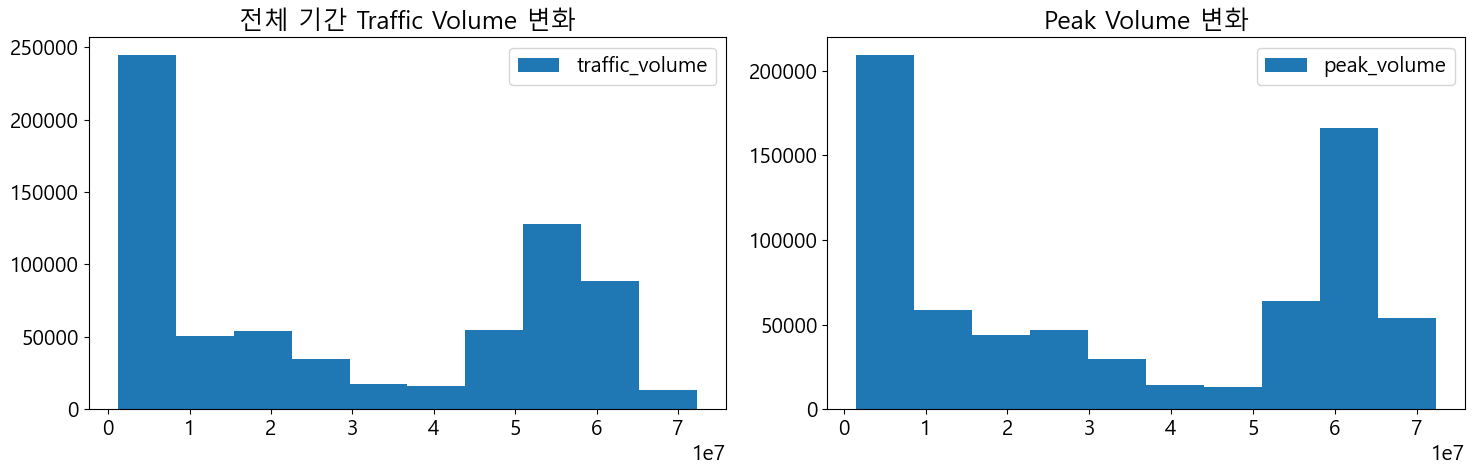

In [22]:
plt.figure(figsize=(15,5))

# traffic_volume의 히스토그램 그래프
plt.subplot(1,2,1)
plt.hist(df_train['traffic_volume'], label='traffic_volume')
plt.title('전체 기간 Traffic Volume 변화')
plt.legend()

# peak_volume의 히스토그램 그래프
plt.subplot(1,2,2)
plt.hist(df_train['peak_volume'], label='peak_volume')
plt.title('Peak Volume 변화')
plt.legend()

plt.tight_layout()
plt.show()

#### <font color=blue> Traffic Volume </font>
- 정의 : 네트워크 트래픽 용량 -> 현재 시점 t에서 관측된 네트워크 트랙픽 용량
- 즉, 해당 시점의 트래픽 크기를 의미함
#### 특성 >
    - 순간적인 형태 반영
    - 사용자가 몰리는 경우, traffic_volume의 값이 커짐
    - 대부분 값이 작은 편으로 정상적인 트래픽 상태
    - but 특정 시점에서 폭발적으로 값이 증가하면 비정상적인 트래픽이나 이벤트가 발생함을 의미

#### <font color=red> -> 현재 상태 진단에 유용 </font>

#### <font color=blue> Peak Volume </font>
- 정의 : 현재 시점 t에서 앞으로 10초 구간(t+1 ~ t+10, 100ms 간격) 중에서 발생할 traffic_volume의 최댓값
- 즉, 지금 시점으로 가까운 미래에서 발생할 수 있는 트래픽 최고치
#### 특성 >
    - 미래 예측 지표 -> 단순한 평균 또는 합이 아니라 최악의 상태(최대 부하)를 반영
    - 현재 시점에서 traffic이 낮더라도, 몇 초 후에 갑자기 트래픽이 폭등하면 peak_volume은 해당 값을 반영
    - peak_volume의 수치가 중요함

#### <font color=red> -> 앞으로 순간적으로 발생할 수 있는 과부하 예측 </font>

1. 초반 0~300ms : 전체적으로 값이 비슷 -> 트래픽 변화가 거의 없음을 예측가능
2. 100~200ms : 비슷
3. 200~300ms : 

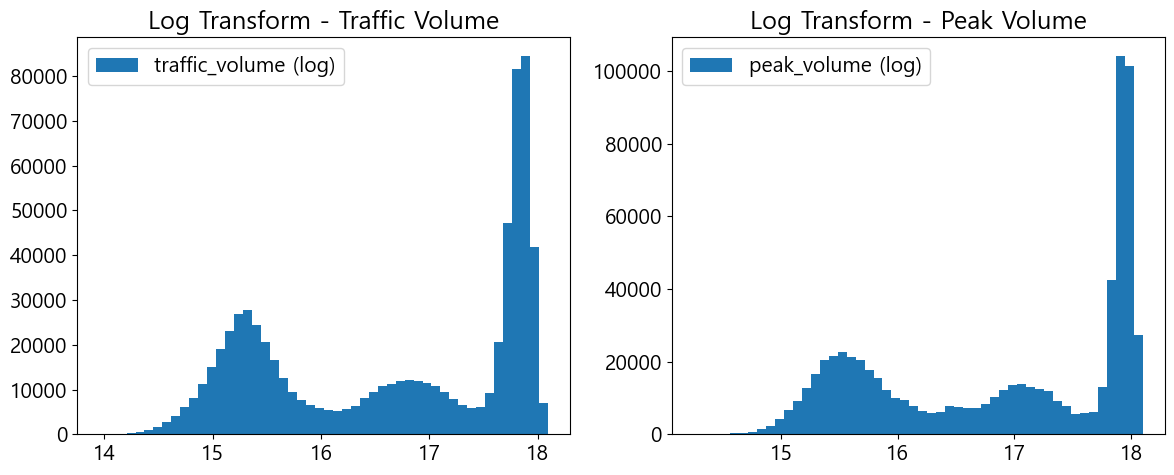

In [24]:
plt.figure(figsize=(12,5))

# traffic_volume log
plt.subplot(1,2,1)
plt.hist(np.log1p(df_train['traffic_volume']), bins=50, label='traffic_volume (log)')
plt.title('Log Transform - Traffic Volume')
plt.legend()

# peak_volume log
plt.subplot(1,2,2)
plt.hist(np.log1p(df_train['peak_volume']), bins=50, label='peak_volume (log)')
plt.title('Log Transform - Peak Volume')
plt.legend()

plt.tight_layout()
plt.show()

1. 뽀족한 봉우리 존재
- 15, 17
-  즉, 단일한 분포가 아닌 여러 상태를 오가며 발생

2. 두 그래프의 분포가 거의 유사
- 현재 트래픽 크기와 10초 안의 최대 트래픽이 연동될 가능성이 높음
- 따라서, 현재 상태를 알면 미래 피크를 어느 정도 예상 가능

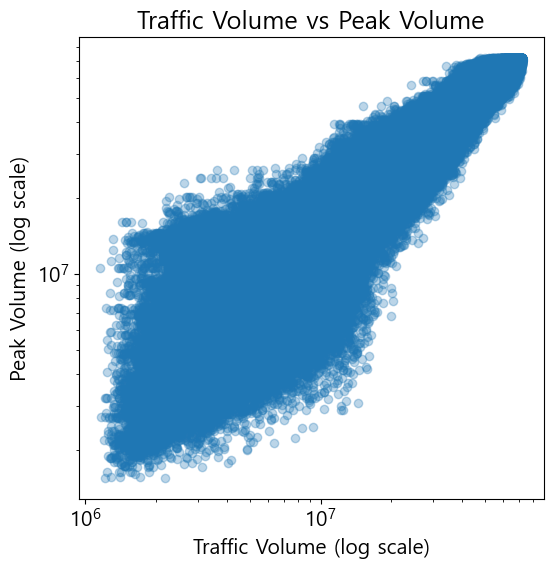

                traffic_volume  peak_volume
traffic_volume        1.000000     0.985129
peak_volume           0.985129     1.000000


In [25]:
plt.figure(figsize=(6,6))
plt.scatter(df_train['traffic_volume'], df_train['peak_volume'], alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Traffic Volume (log scale)')
plt.ylabel('Peak Volume (log scale)')
plt.title('Traffic Volume vs Peak Volume')
plt.show()

# 상관계수 계산
corr = df_train[['traffic_volume','peak_volume']].corr()
print(corr)

1. 대각선 주변에 다수의 점 분포
- 상관계수도 = 0.985129 -> 거의 완벽한 선형 관계
- 현재 트래픽이 크면 10초 안의 피크도 클 가능성이 높음

2. (주의) 선형에 가깝지만 값이 퍼져있음
- 점이 완전히 직선 위에 위치하지 않음
- 따라서, 10초 안의 피크는 달라질 수 있음
- 결과적으로, 트래픽은 비슷하지만 갑자기 값이 튀는(=급상승) 경우가 발생할 수 있음

3. 로그 변환 후와 산점도를 비교한 후 두 값이 거의 비례적으로 나타난다는 사실 파악
- peak_volume = k * traffic_volume
- 해당 수식의 형태로 모델링할 수 있음을 예측함

4. 이때, 두 값은 완전히 같지 않음을 주의
- peak_volume - traffic_volume
- 해당 수식을 통해 추가적인 트래픽 증가/감소치를 측정 및 예상

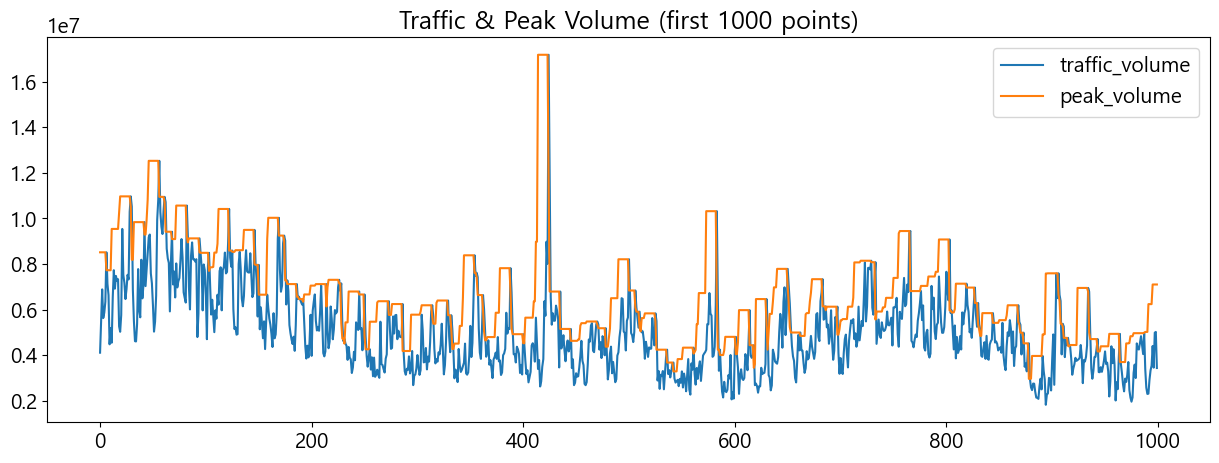

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df_train['traffic_volume'].values[:1000], label='traffic_volume')
plt.plot(df_train['peak_volume'].values[:1000], label='peak_volume')
plt.title('Traffic & Peak Volume (first 1000 points)')
plt.legend()
plt.show()


1. 위 두 그래프와 마찬가지로 전반적인 추세 일치
2. 전반적으로, peak(주황선)가 traffic(파랑선)보다 더 위쪽으로 나타나는 경우가 많음
3. 갑작스러운 값 상승
- 400 부근에서 갑작스러운 값 상승
- 혼잡 발생 구간으로 예측

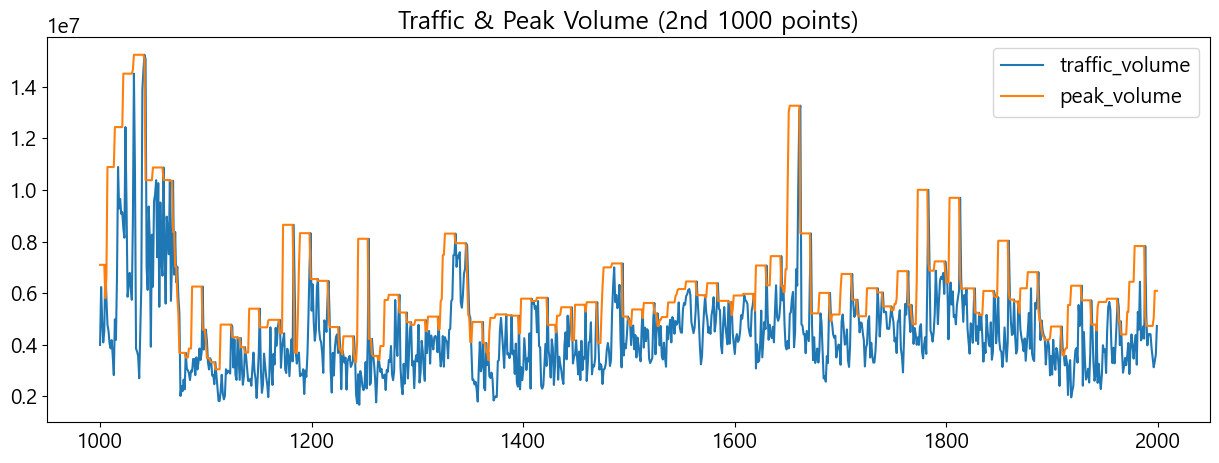

In [29]:
plt.figure(figsize=(15,5))
x = np.arange(1000, 2000)  # 1000~1999
plt.plot(x, df_train['traffic_volume'].values[1000:2000], label='traffic_volume')
plt.plot(x, df_train['peak_volume'].values[1000:2000], label='peak_volume')
plt.title('Traffic & Peak Volume (2nd 1000 points)')
plt.legend()
plt.show()
